In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import display

In [2]:
def make_plot(results):

    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    fig, axs = plt.subplots(1,len(sizes), figsize=(28,6))
        
    fig.suptitle(results[0][2])
    
    for i in range(len(sizes)):
       
        relevant_results = [result for result in results if result[3] == sizes[i]]

        axs[i].set_title(f"size {sizes[i]}")

        legend = []

        for result in relevant_results:
            axs[i].plot(result[0]['average'])
            legend.append(result[1])
        axs[i].legend(legend)
        axs[i].set(xlabel="iterations")


## Evaluation results

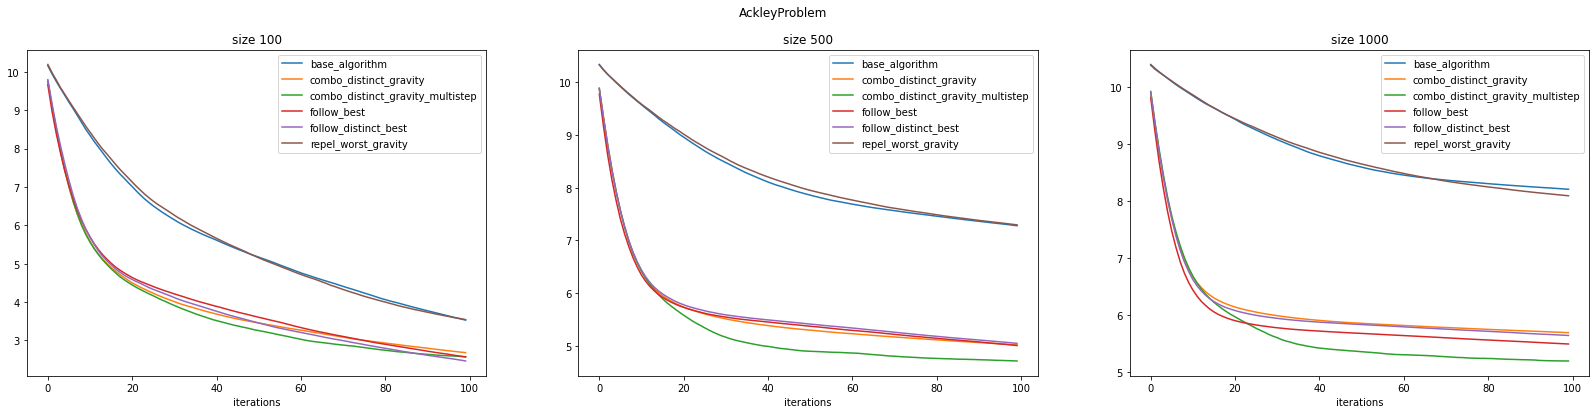

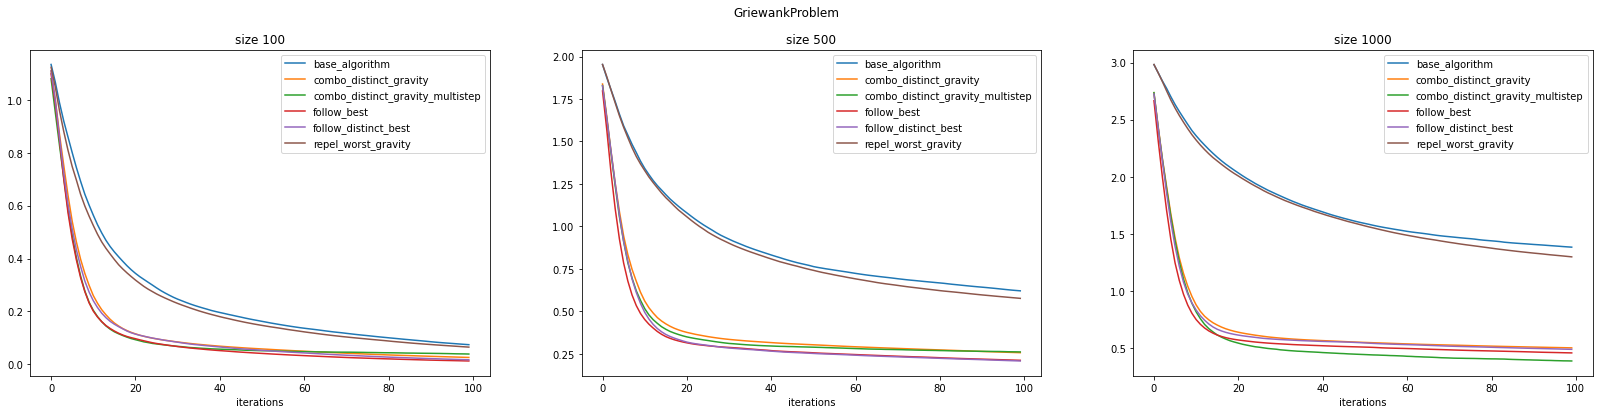

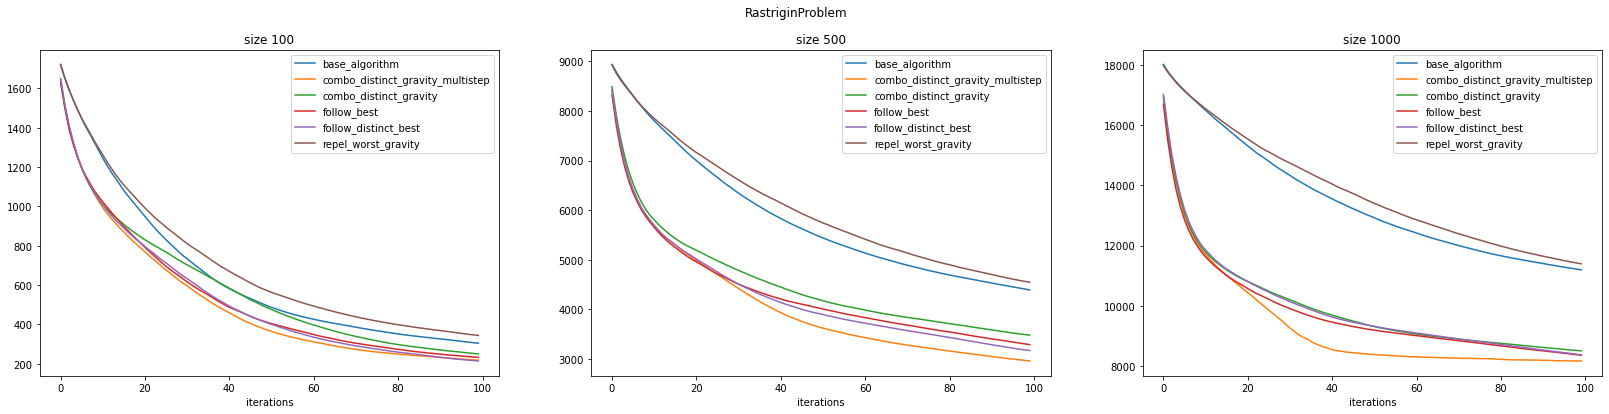

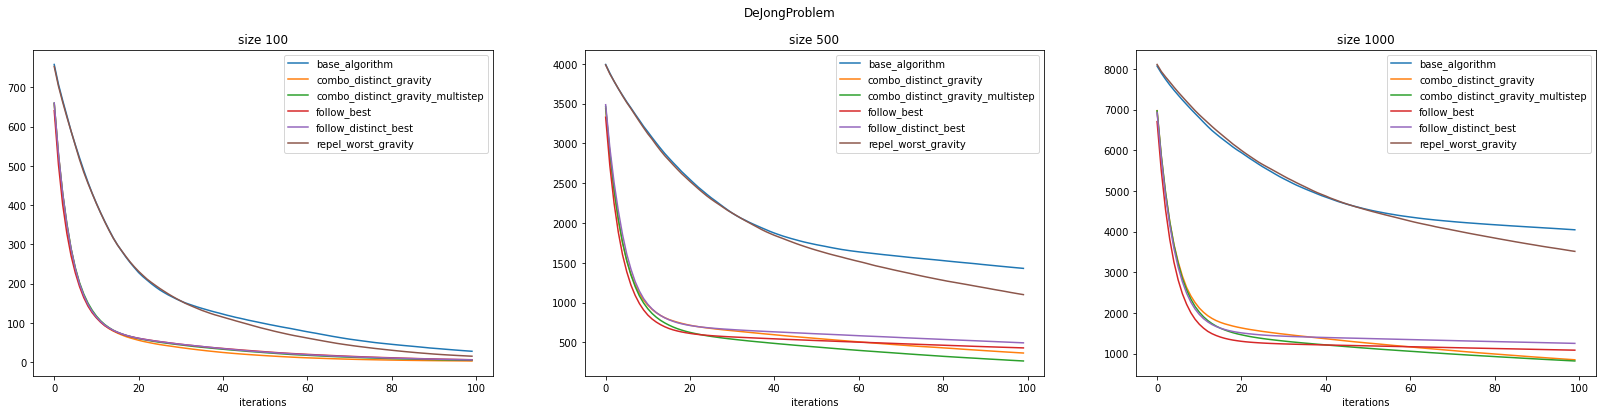

In [4]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    if os.path.isfile(f'results/{filename}') and filename.endswith(".json"):
        with open(f'results/{filename}','r') as file:
            result = json.loads(file.read())

            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])

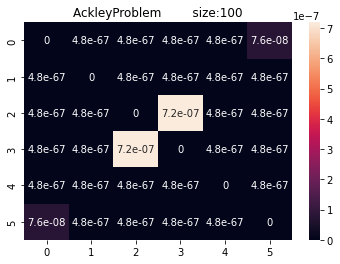

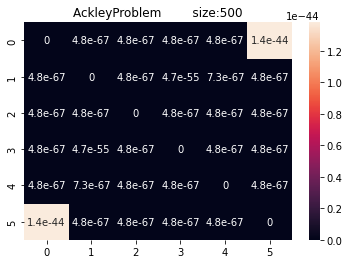

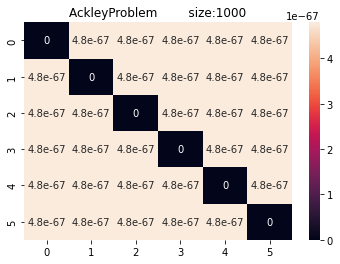

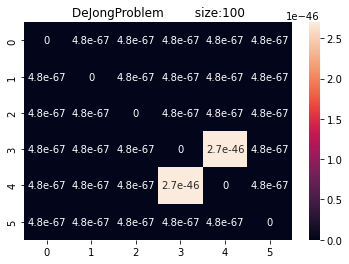

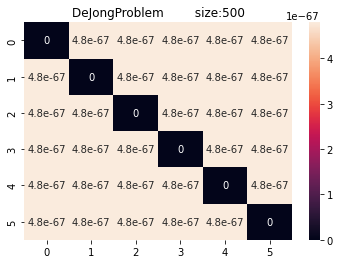

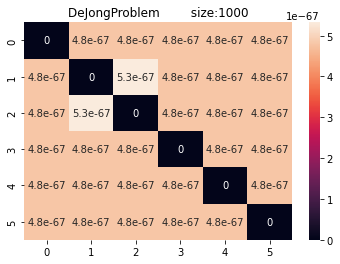

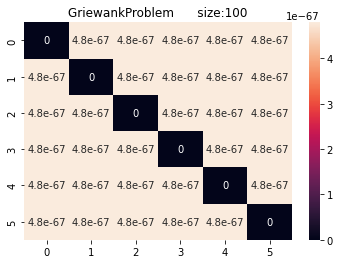

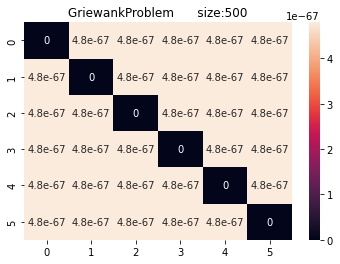

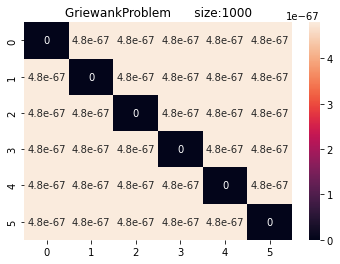

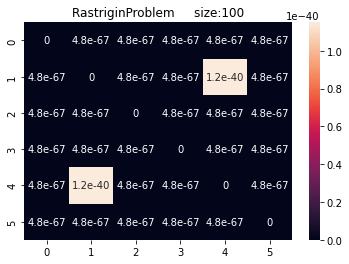

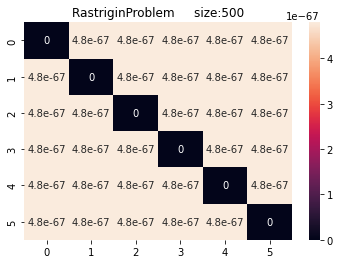

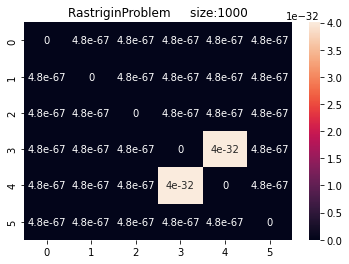

In [69]:
from scipy import stats
import seaborn as sns

result_files = os.listdir('results')

results = []

for filename in result_files:
    if os.path.isfile(f'results/{filename}') and filename.endswith(".json"):
        with open(f'results/{filename}','r') as file:
            result = json.loads(file.read())

            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
            

assorted_results = {}

for (result, alg_name, problem_name, problem_size) in results:
    if problem_name not in assorted_results:
        assorted_results[problem_name] = {}
    if problem_size not in assorted_results[problem_name]:
        assorted_results[problem_name][problem_size] = {}
            
    assorted_results[problem_name][problem_size][alg_name] = result['population'][-1]


for problem_name in assorted_results:
    sizes = list(assorted_results[problem_name].keys())
    sizes.sort()
    for problem_size in sizes:
        algs = list(assorted_results[problem_name][problem_size].keys())
        
        comp_mat = np.zeros(shape=(len(algs),len(algs)))
        
        for i, alg1 in enumerate(algs):
            for j, alg2 in enumerate(algs):
                
                if i == j:
                    comp_mat[i,j] = 0 # ignore diagonal
                    continue
                    
                res1 = assorted_results[problem_name][problem_size][alg1]
                res2 = assorted_results[problem_name][problem_size][alg2]
                
                comp_mat[i,j] = stats.kruskal(res1,res2).pvalue
                
        plt.figure()
        plt.title(f"{problem_name:<20} size:{problem_size}")
        sns.heatmap(comp_mat, annot=True)
                


In [72]:
from scipy import stats
import seaborn as sns

result_files = os.listdir('results')

results = []

for filename in result_files:
    if os.path.isfile(f'results/{filename}') and filename.endswith(".json"):
        with open(f'results/{filename}','r') as file:
            result = json.loads(file.read())

            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
            

assorted_results = {}

for (result, alg_name, problem_name, problem_size) in results:
    if problem_name not in assorted_results:
        assorted_results[problem_name] = {}
    if problem_size not in assorted_results[problem_name]:
        assorted_results[problem_name][problem_size] = {}
            
    assorted_results[problem_name][problem_size][alg_name] = result['population'][-1]


for problem_name in assorted_results:
    sizes = list(assorted_results[problem_name].keys())
    sizes.sort()
    for problem_size in sizes:
        algs = list(assorted_results[problem_name][problem_size].keys())
                
        all_res = [assorted_results[problem_name][problem_size][alg] for alg in algs]
                
        kruskp = stats.kruskal(*all_res).pvalue
        print(f"{problem_name:<20} size:{problem_size}  kruskal: {kruskp}")
                

AckleyProblem        size:100  kruskal: 1.0857709418944046e-236
AckleyProblem        size:500  kruskal: 5.356174055563362e-246
AckleyProblem        size:1000  kruskal: 7.912347817463399e-250
DeJongProblem        size:100  kruskal: 1.5581385936788754e-247
DeJongProblem        size:500  kruskal: 7.912347817463399e-250
DeJongProblem        size:1000  kruskal: 8.00486532980575e-250
GriewankProblem      size:100  kruskal: 7.912347817463399e-250
GriewankProblem      size:500  kruskal: 7.912347817463399e-250
GriewankProblem      size:1000  kruskal: 7.912347817463399e-250
RastriginProblem     size:100  kruskal: 6.521623494987331e-247
RastriginProblem     size:500  kruskal: 7.912347817463399e-250
RastriginProblem     size:1000  kruskal: 5.70989833563433e-246
